# Pymaceuticals Inc.
---

### Analysis

- The Tumor volume data is a symmetrical since the mean and median results for each drug regimen is almost identical.
- Capomulin and Ramicane have the highest count of mice tested for each Drug Regimen while the Proriva has the lowest count.
- The tumor volume over time for Mouse l509 (Capomulin) decreases during the 45 days of treatment.It took about 20 days for the   drug Capomulin to start working.
- The correlation between mouse weight and the average tumor volume for the entire "Capomulin" regimen is 0.84, therefore it is   a positive correlation.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

combined_data = pd.merge(study_results,mouse_metadata, on="Mouse ID", how="left")
# Display the data table for preview
combined_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
# Checking the number of mice.
combined_data_df = combined_data["Mouse ID"]
#combined_data_df
mice_count = len((combined_data_df).unique())
#Mice_count = len(combined_data['Mouse ID'].unique())
mice_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
#Alternate solution: For loop 
#for mouse_id in duplicate_ids:
    #duplicates = combined_data[combined_data['Mouse ID'] == mouse_id]
#duplicates  
duplicate_ids = duplicates['Mouse ID'].unique()
duplicate_ids

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#clean_data =combined_data.drop_duplicates(subset=["Mouse ID"], keep=False,)

for mouse_id in duplicate_ids:
   clean_data = combined_data[combined_data['Mouse ID'] != mouse_id]
# Optional: Get all the data for the duplicate mouse ID. 

clean_data




,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [8]:
# Checking the number of mice in the clean DataFrame.
count_mice_clean = clean_data['Mouse ID'].nunique()
count_mice_clean

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
Drug_Regimen_grouped=clean_data.groupby('Drug Regimen')
Drug_summary_stats=Drug_Regimen_grouped['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
Drug_summary_stats =Drug_summary_stats.rename(columns={'mean': 'Mean Tumor Volume',
                                              'median': 'Median Tumor Volume',
                                              'var': 'Tumor Volume Variance',
                                              'std': 'Tumor Volume Std. Dev.',
                                              'sem': 'Tumor Volume Std. Err.'})
Drug_summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
Drug_summary_stats=Drug_summary_stats.rename(columns={'Mean Tumor Volume':'mean',
                                               'Median Tumor Volume':'median',
                                              'Tumor Volume Variance':'var' ,
                                              'Tumor Volume Std. Dev.':'std',
                                               'Tumor Volume Std. Err.':'sem'})

Drug_summary_stats.columns = pd.MultiIndex.from_product([['Tumor Volume (mm3)'], Drug_summary_stats.columns])
Drug_summary_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# Observe Mouse Timepoints'>

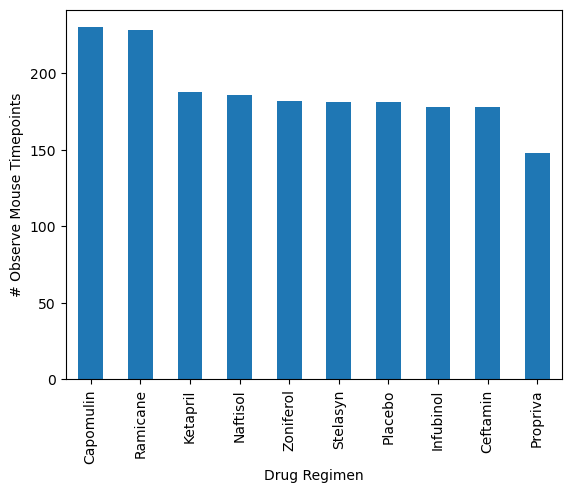

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
Observe_Mouse_Timepoints = clean_data['Drug Regimen'].value_counts()
Observe_Mouse_Timepoints.plot(kind='bar', xlabel='Drug Regimen', ylabel='# Observe Mouse Timepoints')

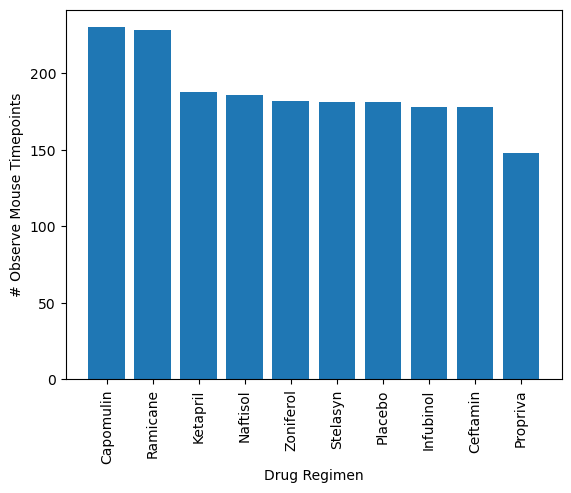

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(Observe_Mouse_Timepoints.index, Observe_Mouse_Timepoints.values)
plt.xlabel('Drug Regimen')
plt.ylabel('# Observe Mouse Timepoints')
plt.xticks(rotation=90)
plt.show()

<Axes: ylabel='Sex'>

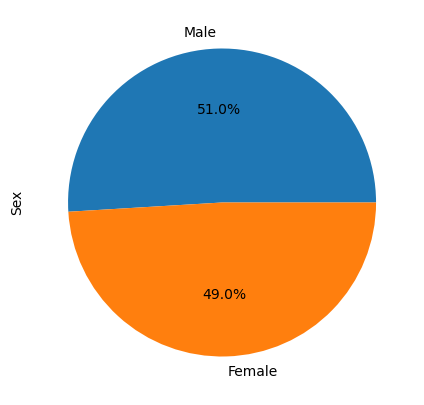

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_counts = clean_data['Sex'].value_counts()
plt.figure(figsize=(5, 5))
gender_counts.plot(kind='pie', autopct='%1.1f%%')

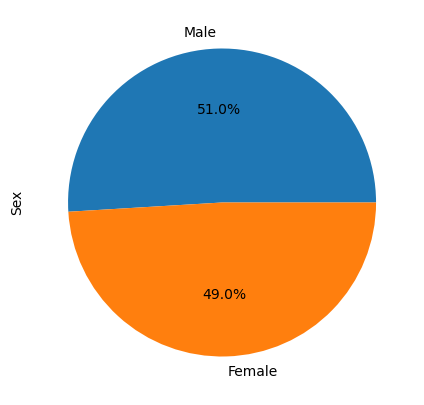

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure(figsize=(5, 5))
plt.ylabel("Sex")
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
processed_data = clean_data[clean_data['Drug Regimen'].isin(regimens)]
# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = processed_data.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volumes = pd.merge(processed_data, last_timepoints, on=['Mouse ID', 'Timepoint'])

final_tumor_volumes = final_tumor_volumes[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']]

final_tumor_volumes 

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,u153,Ceftamin,45.000000
1,b447,Ceftamin,45.000000
2,x226,Ceftamin,45.000000
3,t573,Ceftamin,45.000000
4,c326,Infubinol,36.321346
...,...,...,...
95,a644,Ramicane,32.978522
96,i177,Ramicane,33.562402
97,r944,Capomulin,41.581521
98,u364,Capomulin,31.023923


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.                        
# Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    tumor_vol = final_tumor_volumes.loc[final_tumor_volumes['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    tumor_vol_data.append(tumor_vol)
    
    
    # add subset 
    quartiles = tumor_vol.quantile([0.25, 0.5, 0.75])
    ([0.25, 0.5, 0.75])
    lowqtr = quartiles[0.25]
    uppqtr = quartiles[0.75]
    iqr = uppqtr - lowqtr
    # Determine outliers using upper and lower bounds
    lower_bound = lowqtr - (1.5 * iqr)
    upper_bound = uppqtr + (1.5 * iqr)
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    
    
    print(f"{treatment} potential outliers:{outliers}")
   

Capomulin potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers:4    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)


Text(0.5, 1.0, 'Distribution of Tumor Volume by Treatment')

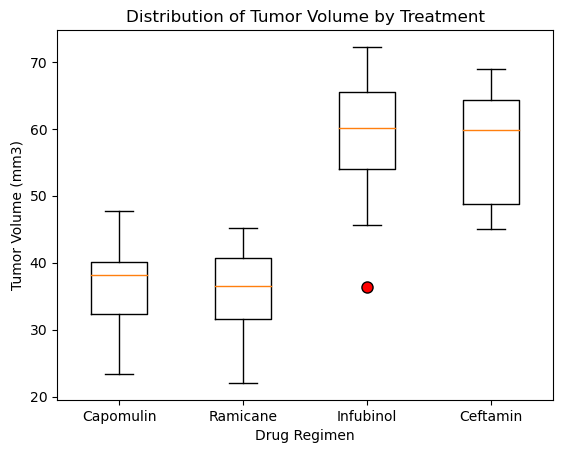

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Dictionary to store the tumor volume data for each treatment
tumor_vol_dict = {treatments[i]: tumor_vol_data[i] for i in range(len(treatments))}

# Box plot of the tumor volume data for each treatment
labels = [treatment for treatment in treatments]
plt.boxplot(tumor_vol_dict.values(), labels=labels,flierprops=dict(marker='o', markerfacecolor='red', markersize=8))
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Distribution of Tumor Volume by Treatment')

## Line and Scatter Plots

Text(0.5, 1.0, 'Tumor Volume over Time for Mouse l509 (Capomulin)')

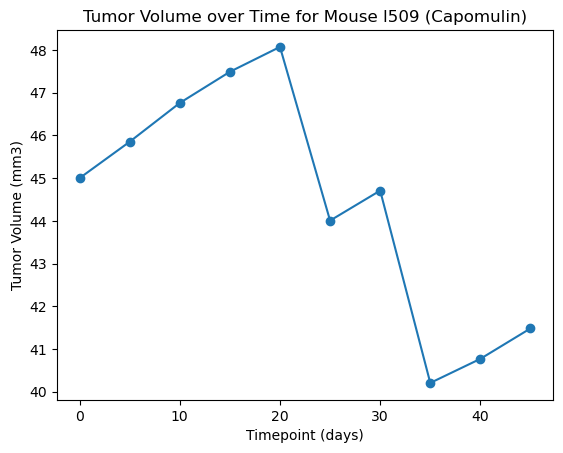

In [18]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = clean_data[clean_data['Drug Regimen'] == 'Capomulin']
l509_data = capomulin_data[capomulin_data['Mouse ID'] == 'l509']

plt.plot(l509_data['Timepoint'], l509_data['Tumor Volume (mm3)'], marker='o')

# Set the axis labels and title
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume over Time for Mouse l509 (Capomulin)')

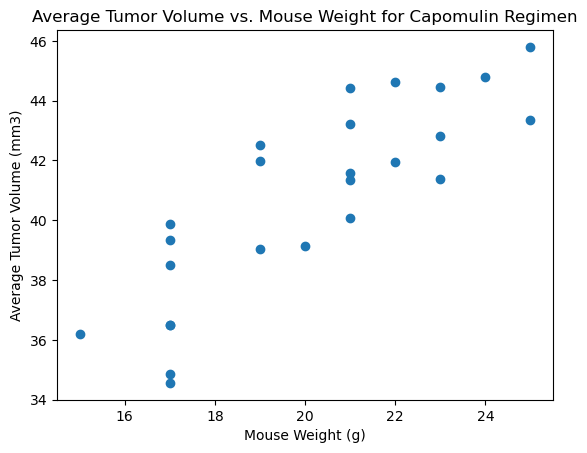

In [19]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
mouse_weight_data = capomulin_data.groupby('Mouse ID').agg(avg_tumor_vol=('Tumor Volume (mm3)', 'mean'),
    mouse_weight=('Weight (g)', 'mean'))

plt.scatter(mouse_weight_data['mouse_weight'], mouse_weight_data['avg_tumor_vol'])
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume vs. Mouse Weight for Capomulin Regimen')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


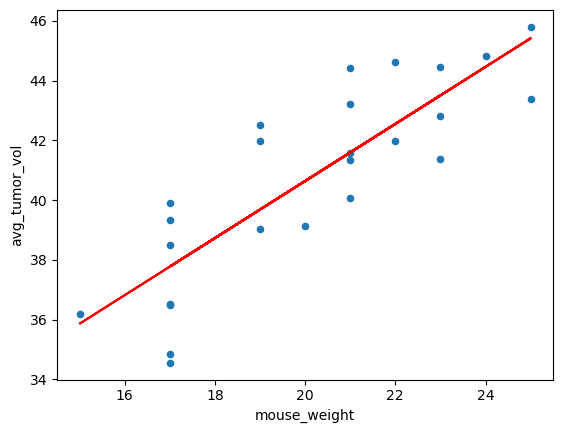

In [20]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
mouse_weight_data.plot(kind='scatter', x='mouse_weight', y='avg_tumor_vol')

correlation = mouse_weight_data['mouse_weight'].corr(mouse_weight_data['avg_tumor_vol'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation,2)}")

slope, intercept, rvalue, pvalue, stderr = st.linregress(mouse_weight_data['mouse_weight'], mouse_weight_data['avg_tumor_vol'])


regression_line = slope * mouse_weight_data['mouse_weight'] + intercept
plt.plot(mouse_weight_data['mouse_weight'], regression_line, color='red')
plt.show()